<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1 
# *Logistic Regression*

## Predicting Survival on the Titanic

The Titanic sank during her maiden voyage after colliding with an iceberg (April 15, 1912). Due to a commercial decision there were insufficient lifeboats, a fact that was partially responsible for the loss 1,502 out of 2,224 passengers and crew. 

The Titanic dataset incorporates many features of typical real-world problems: a mixture of continuous and discrete features, missing data, linear covariance, and an element of random chance. Predicting survival therefore involves many practical data science skills.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

### 1. Load Data

Load the `titanic.csv` file into a DataFrame named "titanic", with index column = `PassengerId`. Display the head of the DataFrame.

In [2]:
# ANSWER
df = pd.read_csv('../DATA/titanic_train.csv')

Why would we want to set an index column based on `PassengerId`?

ANSWER: This column is the key to training and testing our model. We use it to partition the dataset and to test the predictions of our model against known outcomes.

<a name="datadictionary"></a>
### 2. Data Dictionary 

If a data dictionary is available, it is handy to include it in the notebook for reference:

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

### 2. EDA

Explore dataset. Find features to predict `Survived`. Get rid of null values. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [5]:
#Replace Age null values with median value

In [6]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#Replace null values in Cabin column
df['Cabin'] = df['Cabin'].fillna('No Cabin')

In [9]:
#Dataset should have no more null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
#Select only numerical data
numerical_data = df.select_dtypes(exclude = object)

#Correlation of variables with whether they survived or not
numerical_data.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.064910
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

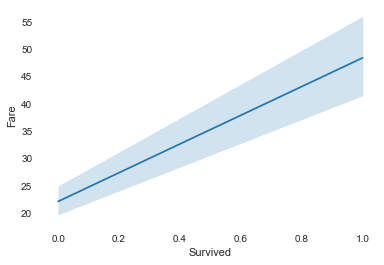

In [11]:
sns.lineplot(data = df,
                x = 'Survived',
                y = 'Fare')

#Fare looks like a reasonable feature

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

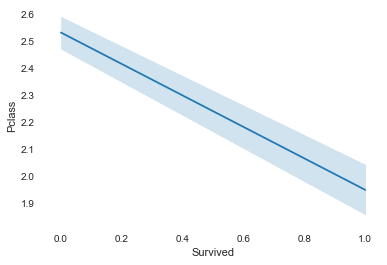

In [12]:
sns.lineplot(data = df,
                x = 'Survived',
                y = 'Pclass')

#Pclass also looks reasonable

<AxesSubplot:xlabel='Age', ylabel='Sex'>

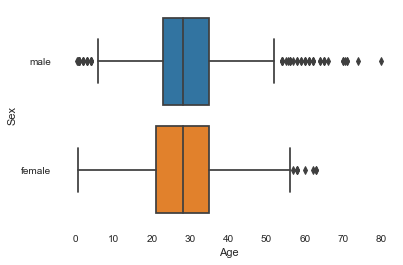

In [119]:
sns.boxplot(data = df, x = 'Age', y = 'Sex')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

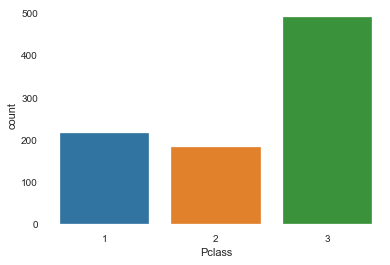

In [120]:
sns.countplot(data = df, 
              x = 'Pclass')

<AxesSubplot:>

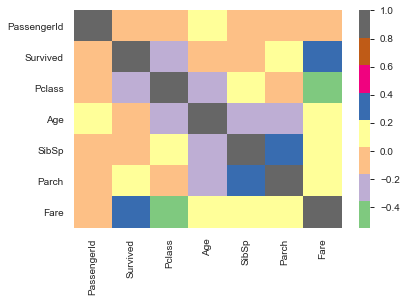

In [130]:
sns.heatmap(df.corr(), cmap = 'Accent')

#blue chunks have some corr, beware of multicollinearity?

### 3. Numerical Predictors Only

#### 3.1. Set Target and Features

To begin, let's try a model based on the passenger class (`Pclass`) and parents/children features (`Parch`):

In [13]:
X = df[['Pclass','Parch']]
y = df['Survived']

#### 3.2 Partition

Partition the data into training and testing subsets:

- Use `random_state` = 1

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### 3.3. Build Model

Prepare a model by creating an instance of the `LogisticRegression` class from the `sklearn.linear_model` library:

In [15]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()


Now train it on the training data subset, using the `fit` method of the model object (Nb. by default, `fit` will print the hyperparameters of the model):

In [16]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The computed coefficients are an array (`coef_`) stored in the 1st element of an array:

In [17]:
logmodel.coef_

array([[-0.90824213,  0.33432156]])

The computed intercept (`intercept_`) is the 1st element of another array:

In [18]:
logmodel.intercept_

array([1.40820621])

We can create tuples of the predictor names and coefficients like this:

In [19]:
# ANSWER
print(set(zip(X.columns, logmodel.coef_[0])))

{('Pclass', -0.908242134146983), ('Parch', 0.334321555147779)}


If we want formatted output, here is a neat way to list the coefficients by predictor:

In [20]:
for col in zip(X_train.columns, logmodel.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names

Pclass      -0.908242
Parch       +0.334322


This result implies that survival declines with passenger class (i.e. 1st class is highest) but increases with the number of parents or children in a group.

Let's see how well the model fit the training data. The `accuracy_score` is the proportion of correct predictions:

In [21]:
predictions = logmodel.predict(X_test)

In [22]:
from sklearn import metrics
metrics.accuracy_score(y_true = y_test,
                       y_pred = predictions)

0.6536312849162011

What is the  `accuracy_score` for the test data?

In [23]:
print('Accuracy score:', metrics.accuracy_score(y_true = y_test,
                       y_pred = predictions))

Accuracy score: 0.6536312849162011


What can we say aout this result?

ANSWER
- The model predicted 65% of the data points correctly
- Does not seem very accurate

#### 3.4. Add `AGE` as Feature

Let's include `Age` in the model. As we know from our EDA, this feature has many missing values. We don't want to throw away so many rows, so we will replace `NA` values with imputed values (e.g. the overall mean age):

In [24]:
# Build Model
X_withage = df[['Pclass','Parch','Age']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X_withage, y, test_size=0.2, random_state=1)

# Fit Model
logmodel_withage = LogisticRegression()
logmodel_withage.fit(X_train, y_train)

age_predictions = logmodel_withage.predict(X_test)

print('Accuracy score:', metrics.accuracy_score(y_test,age_predictions))



Accuracy score: 0.6703910614525139


So, including age did little to reduce the variance in our model. Why might this be?

In [25]:
df.corr()['Age']

PassengerId    0.034212
Survived      -0.064910
Pclass        -0.339898
Age            1.000000
SibSp         -0.233296
Parch         -0.172482
Fare           0.096688
Name: Age, dtype: float64

ANSWER

- Our age column was not clean so the replaced values might not be as valuable.
- Age exhibits some correlation with Parch and Pclass. 
- M

Let's see where the model is going wrong by showing the Confusion Matrix:

In [26]:
# ANSWER

print(metrics.confusion_matrix(y_test, age_predictions))

[[89 17]
 [42 31]]


Nb. Here is how `confusion_matrix` arranges its output:

In [27]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


Which type of error is more prevalent?

ANSWER: False Negatives are more prevalent. We might want to change the model to lower the threshold for classifying a positive Survived outcome.

Maybe we aren't using the right cut-off value. By default, we are predicting that `Survival` = True if the probability >= 0.5, but we could use a different threshold. The ROC curve helps us decide (as well as showing us how good our predictive model really is):

In [28]:
#Predict_proba gives probability of obtaining that value
#For binary variable with 2 outcomes (0,1), returns 2 columns describing P(output = 0) and P(output = 1)
preds = logmodel_withage.predict_proba(X_test)
preds.shape


(179, 2)

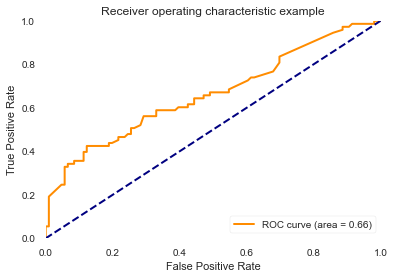

In [29]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logmodel_withage.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

### 4. Including Categorical Predictors

So far, we've only used numerical features for prediction. Let's convert the character features to dummy variables so we can include them in the model:

In [30]:
titanic_with_dummies = pd.get_dummies(data = df, columns = ['Sex', 'Embarked', 'Pclass'], 
                                      prefix = ['Sex', 'Embarked', 'Pclass'] )
titanic_with_dummies.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,No Cabin,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,No Cabin,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,No Cabin,0,1,0,0,1,0,0,1


So, this created a column for every possible value of every categorical variable. (A more compact approach would have been to reduce the number of dummy variables by one for each feature, so that the first vriable from each captures two possible states.)

Now that we have data on sex, embarkation port, and passenger class we can try to improve our `Age` imputation by stratifying it by the means of groups within the passenger population:

In [31]:
titanic_with_dummies[["Age", "Parch", "Sex_male", "Pclass_1", "Pclass_2"]].groupby(["Parch", "Sex_male", "Pclass_1", "Pclass_2"])["Age"].transform(lambda x: x.fillna(x.mean()))

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [32]:
titanic_with_dummies['Age'] = titanic_with_dummies[["Age", "Parch", "Sex_male", "Pclass_1", "Pclass_2"]].groupby(["Parch", "Sex_male", "Pclass_1", "Pclass_2"])["Age"].transform(lambda x: x.fillna(x.mean()))

Now train the model using the expanded set of predictors and compute the accuracy score for the test set:

In [33]:
X = titanic_with_dummies.drop(['Survived','Cabin','Ticket','Name'], axis = 1)
y = titanic_with_dummies['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

model = LogisticRegression()
model.fit(X_train,y_train)

predictions = model.predict(X_test)

accuracy = metrics.accuracy_score(y_test,predictions)

print('Accuracy score:', accuracy)

Accuracy score: 0.7982062780269058


D:\Tools\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Plot the ROC curve for the new model:

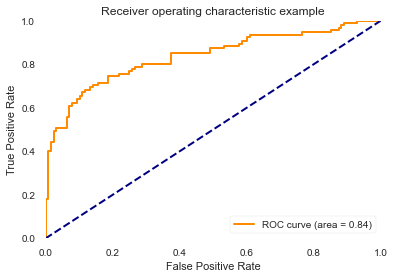

In [34]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = model.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

In [163]:

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
np.array(metrics.roc_curve(y_test, preds)).shape

(3, 105)

Can we improve the model by including the remaining features?

In [35]:
# ANSWER
# The remaining columns ('Cabin','Ticket','Name') don't seem like reasonable variables to include in this model

## Homework

1. Remove the `random_state` parameter (if you have used), so that the data partition will be different every time, and run through the final modelling process a few times. Do the results change?

2. Use cross-validation to assess the quality of the model when overfitting is controlled. Does the accuracy improve?

3. Look at the `fpr` & `tpr` vectors for the best model.

In [132]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:>

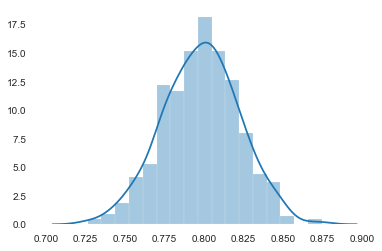

In [145]:
#Trying without random_state argument

X = titanic_with_dummies.drop(['Survived','Cabin','Ticket','Name'], axis = 1)
y = titanic_with_dummies['Survived']

accuracy_scores_norandom = []

for a in np.arange(500):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    model = LogisticRegression()
    model.fit(X_train,y_train)

    predictions = model.predict(X_test)

    accuracy = metrics.accuracy_score(y_test,predictions)

    accuracy_scores_norandom.append(accuracy)
    
sns.distplot(accuracy_scores_norandom)

In [144]:
#Should try with cross-validation too?

<AxesSubplot:>

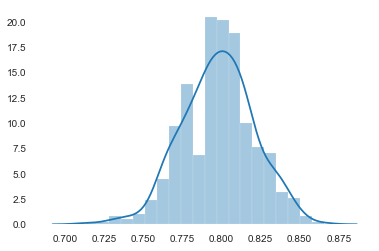

In [146]:
#Trying with regularisation (Ridge)

X = titanic_with_dummies.drop(['Survived','Cabin','Ticket','Name'], axis = 1)
y = titanic_with_dummies['Survived']

accuracy_scores_ridge = []

for a in np.arange(500):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    from sklearn.linear_model import Ridge, RidgeCV

    model = RidgeCV()
    model.fit(X_train,y_train)

    predictions = model.predict(X_test)

    binary_predictions = list(map(lambda x: 
                                     1 if x>0.5 
                                     else 0, 
                                  predictions))

    accuracy = metrics.accuracy_score(y_test,binary_predictions)

    accuracy_scores_ridge.append(accuracy)

sns.distplot(accuracy_scores_ridge)

<AxesSubplot:>

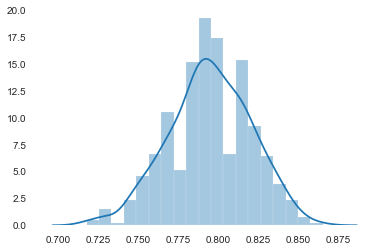

In [147]:
#Trying with regularisation (Lasso)

X = titanic_with_dummies.drop(['Survived','Cabin','Ticket','Name'], axis = 1)
y = titanic_with_dummies['Survived']

accuracy_scores_lasso = []

for a in np.arange(500):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    from sklearn.linear_model import Lasso, LassoCV

    model = LassoCV()
    model.fit(X_train,y_train)

    predictions = model.predict(X_test)

    binary_predictions = list(map(lambda x: 
                                     1 if x>0.5 
                                     else 0, 
                                  predictions))

    accuracy = metrics.accuracy_score(y_test,binary_predictions)

    accuracy_scores_lasso.append(accuracy)

sns.distplot(accuracy_scores_lasso)

In [156]:
print('Mean accuracy of 500 runs for logistic regression:', np.array(accuracy_scores_norandom).mean())
print('Mean accuracy of 500 runs for ridge regression:', np.array(accuracy_scores_ridge).mean())
print('Mean accuracy of 500 runs for lasso regression:', np.array(accuracy_scores_lasso).mean())

#They all look about the same, maybe lasso is worse even?

Mean accuracy of 500 runs for logistic regression: 0.7980986547085203
Mean accuracy of 500 runs for ridge regression: 0.7977668161434979
Mean accuracy of 500 runs for lasso regression: 0.7947623318385649




---



---



> > > > > > > > > © 2019 Institute of Data


---



---



